In [1]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

In [2]:
class MorphologicalTransformations(object):
    def __init__(self, image_file, level):
        self.level = 3 if level < 3 else level
        self.image_file = image_file
        self.MAX_PIXEL = 255
        self.MIN_PIXEL = 0
        self.MID_PIXEL = self.MAX_PIXEL // 2
        self.kernel = np.full(shape=(level, level), fill_value=255)
    
    def read_this(self):
        image_src = cv2.imread(self.image_file, 0)
        return image_src
    
    def convert_binary(self, image_src, thresh_val):
        color_1 = self.MAX_PIXEL
        color_2 = self.MIN_PIXEL
        initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
        final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
        return final_conv

    def binarize_this(self):
        image_src = self.read_this()
        image_b = self.convert_binary(image_src=image_src, thresh_val=self.MID_PIXEL)
        return image_b
    
    def get_flat_submatrices(self, image_src, h_reduce, w_reduce):
        image_shape = image_src.shape
        flat_submats = np.array([
            image_src[i:(i + self.level), j:(j + self.level)]
            for i in range(image_shape[0] - h_reduce) for j in range(image_shape[1] - w_reduce)
        ])
        return flat_submats
        
    def erode_image(self, image_src, with_plot=False):
        orig_shape = image_src.shape
        pad_width = self.level - 2
        
        image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
        pimg_shape = image_pad.shape
        
        h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
        flat_submats = self.get_flat_submatrices(
            image_src=image_pad, h_reduce=h_reduce, w_reduce=w_reduce
        )
        
        image_eroded = np.array([255 if (i == self.kernel).all() else 0 for i in flat_submats])
        image_eroded = image_eroded.reshape(orig_shape)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_eroded, head_text='Eroded - {}'.format(self.level))
            return None
        return image_eroded
    
    def dilate_image(self, image_src, with_plot=False):        
        orig_shape = image_src.shape
        pad_width = self.level - 2
        
        image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
        pimg_shape = image_pad.shape
        
        h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])
        flat_submats = self.get_flat_submatrices(
            image_src=image_pad, h_reduce=h_reduce, w_reduce=w_reduce
        )
        
        image_dilated = np.array([255 if (i == self.kernel).any() else 0 for i in flat_submats])
        image_dilated = image_dilated.reshape(orig_shape)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_dilated, head_text='Dilated - {}'.format(self.level))
            return None
        return image_dilated
    
    def open_image(self, image_src, with_plot=False):
        image_eroded = self.erode_image(image_src=image_src)
        image_opening = self.dilate_image(image_src=image_eroded)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_opening, head_text='Opening - {}'.format(self.level))
            return None
        return image_opening
    
    def close_image(self, image_src, with_plot=False):
        image_dilated = self.dilate_image(image_src=image_src)
        image_closing = self.erode_image(image_src=image_dilated)
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_closing, head_text='Closing - {}'.format(self.level))
            return None
        return image_closing
    
    def morph_gradient(self, image_src, with_plot=False):
        image_dilated = self.dilate_image(image_src=image_src)
        image_eroded = self.erode_image(image_src=image_src)
        image_grad = image_dilated - image_eroded
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_grad, head_text='Gradient Morph - {}'.format(self.level))
            return None
        return image_grad
    
    def extract_boundary(self, image_src, with_plot=False):
        image_eroded = self.erode_image(image_src=image_src)
        ext_bound = image_src - image_eroded
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=ext_bound, head_text='Boundary - {}'.format(self.level))
            return None
        return ext_bound
    
    def get_tophat(self, image_src, with_plot=False):
        image_opening = self.open_image(image_src=image_src)
        image_tophat = image_src - image_opening
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_tophat, head_text='Top Hat - {}'.format(self.level))
            return None
        return image_tophat
    
    def get_blackhat(self, image_src, with_plot=False):
        image_closing = self.close_image(image_src=image_src)
        image_blackhat = image_closing - image_src
        
        if with_plot:
            self.plot_it(orig_matrix=image_src, trans_matrix=image_blackhat, head_text='Black Hat - {}'.format(self.level))
            return None
        return image_blackhat
    
    def plot_it(self, orig_matrix, trans_matrix, head_text):
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        cmap_val = 'gray'
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text(head_text)
        
        ax1.imshow(orig_matrix, cmap=cmap_val)
        ax2.imshow(trans_matrix, cmap=cmap_val)
        plt.show()
        return True


In [3]:
morph = MorphologicalTransformations(image_file='finger.jpeg', level=3)
image_src = morph.binarize_this()

# Erosion 

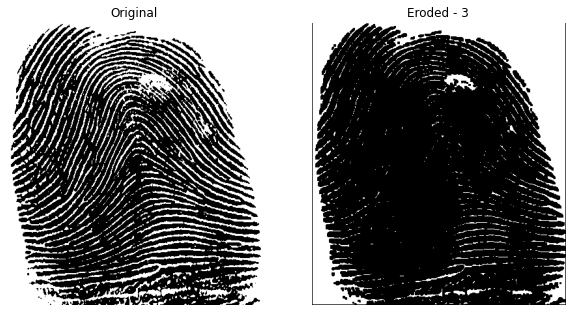

In [4]:
morph.erode_image(image_src=image_src, with_plot=True)

# Dilation 

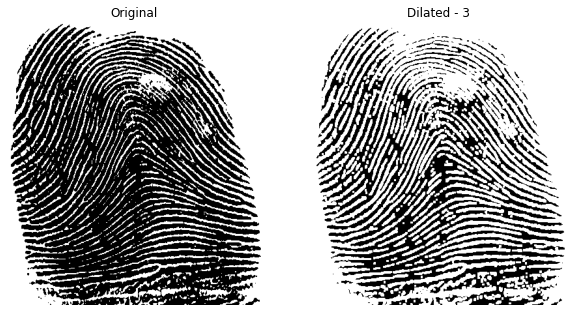

In [5]:
morph.dilate_image(image_src=image_src, with_plot=True)

# Opening

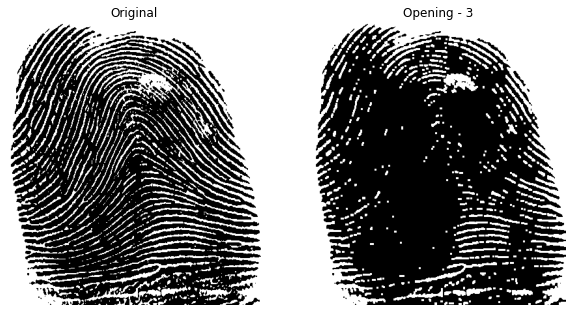

In [6]:
morph.open_image(image_src=image_src, with_plot=True)

# Closing

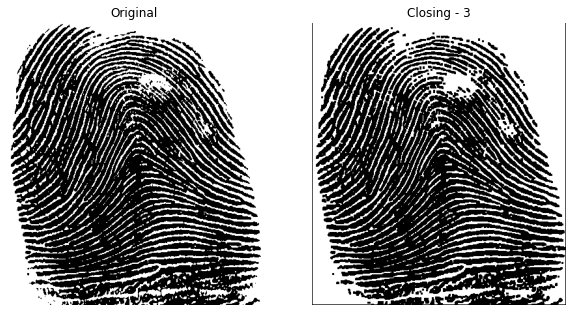

In [8]:
morph.close_image(image_src=image_src, with_plot=True)

# Morphological Gradient

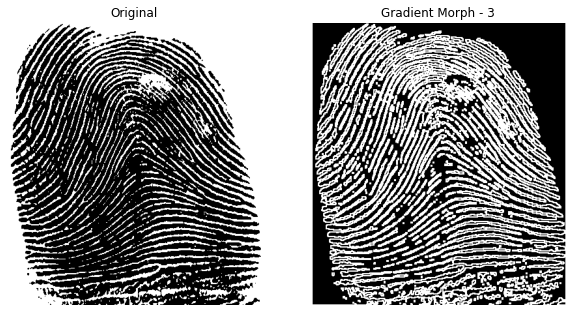

In [10]:
morph.morph_gradient(image_src=image_src, with_plot=True)

# Top Hat

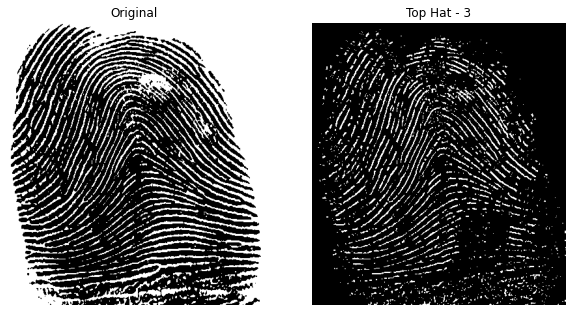

In [12]:
morph.get_tophat(image_src=image_src, with_plot=True)

# Black Hat

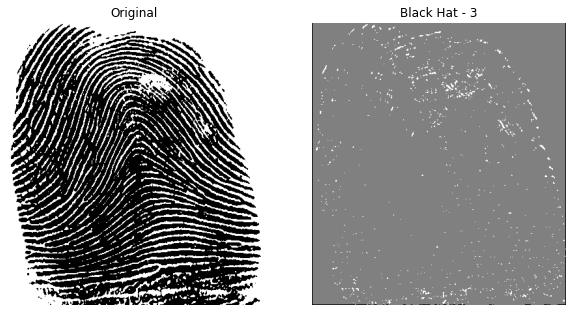

In [14]:
morph.get_blackhat(image_src=image_src, with_plot=True)

# Boundary Extraction

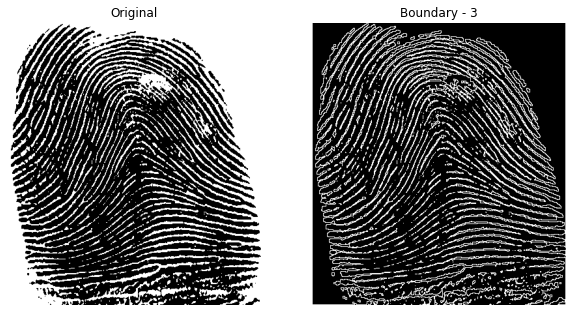

In [16]:
morph.extract_boundary(image_src=image_src, with_plot=True)